In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dill as pkl
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from eval_funcs import (
    perplexity_for_corpora,
    wasserstein_distance_embeddings,
    classify_real_vs_synth,
    compute_stat_properties,
    compute_opt_embeddings
)

from coherence_utils import compute_topic_coherence

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\loren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\loren\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gowrishankarp/newspaper-text-summarization-cnn-dailymail")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\loren\.cache\kagglehub\datasets\gowrishankarp\newspaper-text-summarization-cnn-dailymail\versions\2


In [14]:
cnn_train = pd.read_csv(path + '/cnn_dailymail/train.csv')
cnn_train.head(2)

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...


In [15]:
gemma_data = pd.read_csv('../gemma_1000_outputs.csv').drop('Unnamed: 0', axis=1)
gemma_data.head(2)

,uuid,topic,generated_article,elapsed_time
0,278aa54d-0ed8-4650-886e-99f285cc78e5,World - United Kingdom,The shocking incident occurred in the early ho...,23.479649
1,767d682b-5fde-4186-b3d9-e2de1f8bba8b,World - Middle East,Thousands of Palestinian protesters clashed wi...,17.532754


In [31]:
stats = compute_stat_properties(gemma_data['generated_article'])
with open('pickles/gemma_stats.pkl', 'wb') as f:
        pkl.dump(stats, f)

In [17]:
ppl = perplexity_for_corpora(cnn_train['article'].sample(1000, random_state=42), gemma_data['generated_article'], batch_size=8, max_length=2048)
with open('pickles/gemma_ppl.pkl', 'wb') as f:
        pkl.dump(ppl, f)

[perplexity] device=cuda batch_size=8 max_length(requested)=2048 max_length(effective)=2048
[perplexity] num_docs: real=1000 synthetic=1000 total_batches=250
[perplexity] progress 5/250 | elapsed=9.4s | avg/batch=1.89s | ETA~461.9s
[perplexity] progress 10/250 | elapsed=16.9s | avg/batch=1.69s | ETA~405.4s
[perplexity] progress 15/250 | elapsed=25.3s | avg/batch=1.69s | ETA~396.4s
[perplexity] progress 20/250 | elapsed=33.0s | avg/batch=1.65s | ETA~379.3s
[perplexity] progress 25/250 | elapsed=42.9s | avg/batch=1.72s | ETA~386.5s
[perplexity] progress 30/250 | elapsed=49.1s | avg/batch=1.64s | ETA~359.8s
[perplexity] progress 35/250 | elapsed=55.8s | avg/batch=1.59s | ETA~342.5s
[perplexity] progress 40/250 | elapsed=62.5s | avg/batch=1.56s | ETA~328.1s
[perplexity] progress 45/250 | elapsed=69.1s | avg/batch=1.53s | ETA~314.7s
[perplexity] progress 50/250 | elapsed=77.9s | avg/batch=1.56s | ETA~311.8s
[perplexity] progress 55/250 | elapsed=87.5s | avg/batch=1.59s | ETA~310.2s
[perplex

In [18]:
wd = wasserstein_distance_embeddings(cnn_train['article'].sample(1000, random_state=42), gemma_data['generated_article'], n_projections=128)
with open('pickles/gemma_wd.pkl', 'wb') as f:
        pkl.dump(wd, f)

[embed:real] device=cuda batch_size=8 max_length(req)=2048 max_length(eff)=2048 num_docs=1000
[embed:real] progress 5/125 | elapsed=3.0s | avg/batch=0.60s | ETA~71.5s
[embed:real] progress 10/125 | elapsed=5.9s | avg/batch=0.59s | ETA~68.1s
[embed:real] progress 15/125 | elapsed=9.3s | avg/batch=0.62s | ETA~68.1s
[embed:real] progress 20/125 | elapsed=12.1s | avg/batch=0.60s | ETA~63.3s
[embed:real] progress 25/125 | elapsed=15.3s | avg/batch=0.61s | ETA~61.2s
[embed:real] progress 30/125 | elapsed=18.0s | avg/batch=0.60s | ETA~56.9s
[embed:real] progress 35/125 | elapsed=20.8s | avg/batch=0.59s | ETA~53.4s
[embed:real] progress 40/125 | elapsed=23.6s | avg/batch=0.59s | ETA~50.1s
[embed:real] progress 45/125 | elapsed=26.5s | avg/batch=0.59s | ETA~47.2s
[embed:real] progress 50/125 | elapsed=30.1s | avg/batch=0.60s | ETA~45.1s
[embed:real] progress 55/125 | elapsed=34.0s | avg/batch=0.62s | ETA~43.2s
[embed:real] progress 60/125 | elapsed=37.2s | avg/batch=0.62s | ETA~40.3s
[embed:rea

In [19]:
clf_res = classify_real_vs_synth(cnn_train['article'].sample(1000, random_state=42), gemma_data['generated_article'], cv=5)
with open('pickles/gemma_clf_res.pkl', 'wb') as f:
        pkl.dump(clf_res, f)

[classify] batch_size=8 max_length=2048 cv=5 Cs=[0.1, 0.5, 1.0, 2.0, 5.0]
[embed:real] device=cuda batch_size=8 max_length(req)=2048 max_length(eff)=2048 num_docs=1000
[embed:real] progress 5/125 | elapsed=2.9s | avg/batch=0.57s | ETA~68.8s
[embed:real] progress 10/125 | elapsed=5.7s | avg/batch=0.57s | ETA~66.1s
[embed:real] progress 15/125 | elapsed=8.7s | avg/batch=0.58s | ETA~63.9s
[embed:real] progress 20/125 | elapsed=11.5s | avg/batch=0.57s | ETA~60.3s
[embed:real] progress 25/125 | elapsed=14.7s | avg/batch=0.59s | ETA~58.6s
[embed:real] progress 30/125 | elapsed=17.0s | avg/batch=0.57s | ETA~53.8s
[embed:real] progress 35/125 | elapsed=19.6s | avg/batch=0.56s | ETA~50.5s
[embed:real] progress 40/125 | elapsed=22.6s | avg/batch=0.56s | ETA~48.0s
[embed:real] progress 45/125 | elapsed=25.2s | avg/batch=0.56s | ETA~44.9s
[embed:real] progress 50/125 | elapsed=28.5s | avg/batch=0.57s | ETA~42.7s
[embed:real] progress 55/125 | elapsed=31.9s | avg/batch=0.58s | ETA~40.6s
[embed:real

In [32]:
clf_res

{'metrics': {'accuracy': 1.0, 'macro_f1': 1.0, 'roc_auc': 1.0},
 'report': {'real': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 200.0},
  'synthetic': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 200.0},
  'accuracy': 1.0,
  'macro avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 400.0},
  'weighted avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 400.0}},
 'embeddings_shape': (2000, 768),
 'classifier': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregressioncv',
                  LogisticRegressionCV(Cs=[0.1, 0.5, 1.0, 2.0, 5.0], cv=5,
                                       max_iter=5000, n_jobs=-1,
                                       scoring='roc_auc', solver='saga'))])}

## Evaluation Metrics

## Coherence Evaluation

In [25]:
coherence_result = compute_topic_coherence(
        gemma_data['generated_article'],
        sample_size=1000,
        num_topics=15,
        random_seed=42
    )
with open('pickles/gemma_coherence_result.pkl', 'wb') as f:
        pkl.dump(coherence_result, f)

Processing texts: 100%|██████████| 1000/1000 [00:01<00:00, 899.05it/s]


In [26]:
print("Statistical Properties:\n", stats)
print("\nPerplexity:", ppl)
print("\nWasserstein Distance:", wd)
print("\nClassification Results:\n", clf_res)
print("\nTopic Coherence:\n", coherence_result)
# Save evaluation results to CSV
gemma_evaluation_results = pd.DataFrame({
    'Statistical Properties': [stats],
    'Perplexity': [ppl],
    'Wasserstein Distance': [wd],
    'Classification Results': [clf_res],
    'Topic Coherence': [coherence_result]
})  

gemma_evaluation_results.to_csv('./gemma_evaluation_results.csv', index=False)

Statistical Properties:
 {'avg_len_tokens': 417.7130126953125, 'std_len_tokens': 49.771141052246094, 'avg_len_chars': 2094.407, 'ttr': 0.04242625917795233, 'hapax_ratio': 0.29528269946958585}

Perplexity: {'real': {'corpus_ppl': 20.093418953077368}, 'synthetic': {'corpus_ppl': 16.234016465134882}}

Wasserstein Distance: {'mean_distance': 0.17492436716748822, 'distances': [0.051647697331209906, 0.2792837105230519, 0.07837623473612662, 0.07591936117994236, 0.07556516196145263, 0.13613076573770203, 0.13912276807616353, 0.08479115079740636, 0.13699425003685767, 0.1666035791173717, 0.07872590191209682, 0.44508337798352215, 0.07331576114268379, 0.2207580427842951, 0.39577063372356996, 0.04441288555728952, 0.07603467223982617, 0.32091076085142944, 0.06287123184926674, 0.10814678500887218, 0.07410777432151319, 0.31802183995069555, 0.06975874722027511, 0.046511927083379506, 0.34115461735915376, 0.15312521281095046, 0.1642461908094759, 0.08847834879272612, 0.18742360763451654, 0.127479925391198,

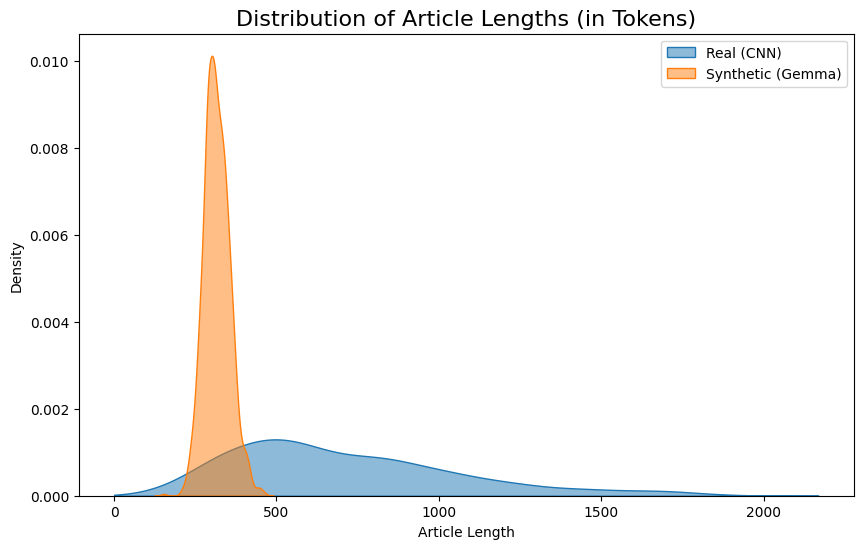

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

# Sample real data to match synthetic data size
real_texts = cnn_train['article'].sample(1000, random_state=42)
synth_texts = gemma_data['generated_article']

len_real = real_texts.str.split().str.len()
len_synth = synth_texts.str.split().str.len()

# Create the plot
plt.figure(figsize=(10, 6))
sns.kdeplot(len_real, label='Real (CNN)', fill=True, alpha=0.5, clip=(0, 4000))
sns.kdeplot(len_synth, label='Synthetic (Gemma)', fill=True, alpha=0.5, clip=(0, 4000))

plt.title('Distribution of Article Lengths (in Tokens)', fontsize=16)
plt.xlabel('Article Length')
plt.ylabel('Density')
plt.legend()
folder_path = "./figures/gemma"
folder = Path(folder_path)
folder.mkdir(parents=True, exist_ok=True)
plt.savefig(folder_path + '/article_length_distribution.png')
plt.show()

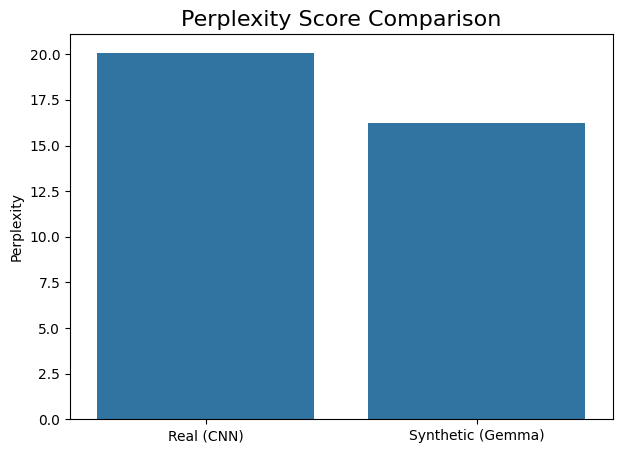

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get the data from your 'ppl' variable
ppl_scores = {
    'Real (CNN)': ppl['real']['corpus_ppl'],
    'Synthetic (Gemma)': ppl['synthetic']['corpus_ppl']
}

# 2. Create the plot
plt.figure(figsize=(7, 5))
sns.barplot(x=list(ppl_scores.keys()), y=list(ppl_scores.values()))

plt.title('Perplexity Score Comparison', fontsize=16)
plt.ylabel('Perplexity')
folder_path = "./figures/gemma"
folder = Path(folder_path)
folder.mkdir(parents=True, exist_ok=True)
plt.savefig(folder_path+'/perplexity_comparison.png')
plt.show()

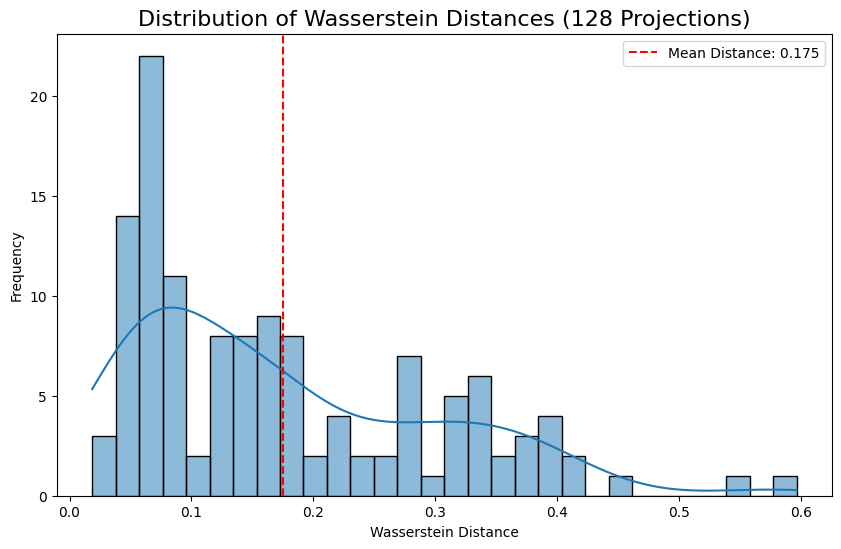

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get data from 'wd'
distances = wd['distances']
mean_dist = wd['mean_distance']

# Create plot
plt.figure(figsize=(10, 6))
sns.histplot(distances, bins=30, kde=True)

plt.axvline(mean_dist, color='red', linestyle='--', label=f'Mean Distance: {mean_dist:.3f}')
plt.title('Distribution of Wasserstein Distances (128 Projections)', fontsize=16)
plt.xlabel('Wasserstein Distance')
plt.ylabel('Frequency')
plt.legend()
folder_path = "./figures/gemma"
folder = Path(folder_path)
folder.mkdir(parents=True, exist_ok=True)
plt.savefig(folder_path+'/wasserstein_distance_distribution.png')
plt.show()

Computing embeddings for REAL texts (for t-SNE)...
[embed:real_tsne] device=cuda batch_size=8 max_length(req)=2048 max_length(eff)=2048 num_docs=1000
[embed:real_tsne] progress 5/125 | elapsed=3.0s | avg/batch=0.61s | ETA~72.6s
[embed:real_tsne] progress 10/125 | elapsed=6.0s | avg/batch=0.60s | ETA~69.1s
[embed:real_tsne] progress 15/125 | elapsed=9.1s | avg/batch=0.61s | ETA~66.6s
[embed:real_tsne] progress 20/125 | elapsed=12.0s | avg/batch=0.60s | ETA~62.8s
[embed:real_tsne] progress 25/125 | elapsed=15.3s | avg/batch=0.61s | ETA~61.2s
[embed:real_tsne] progress 30/125 | elapsed=17.9s | avg/batch=0.60s | ETA~56.5s
[embed:real_tsne] progress 35/125 | elapsed=20.7s | avg/batch=0.59s | ETA~53.3s
[embed:real_tsne] progress 40/125 | elapsed=23.7s | avg/batch=0.59s | ETA~50.3s
[embed:real_tsne] progress 45/125 | elapsed=26.4s | avg/batch=0.59s | ETA~47.0s
[embed:real_tsne] progress 50/125 | elapsed=29.8s | avg/batch=0.60s | ETA~44.8s
[embed:real_tsne] progress 55/125 | elapsed=33.2s | av

c:\Users\loren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


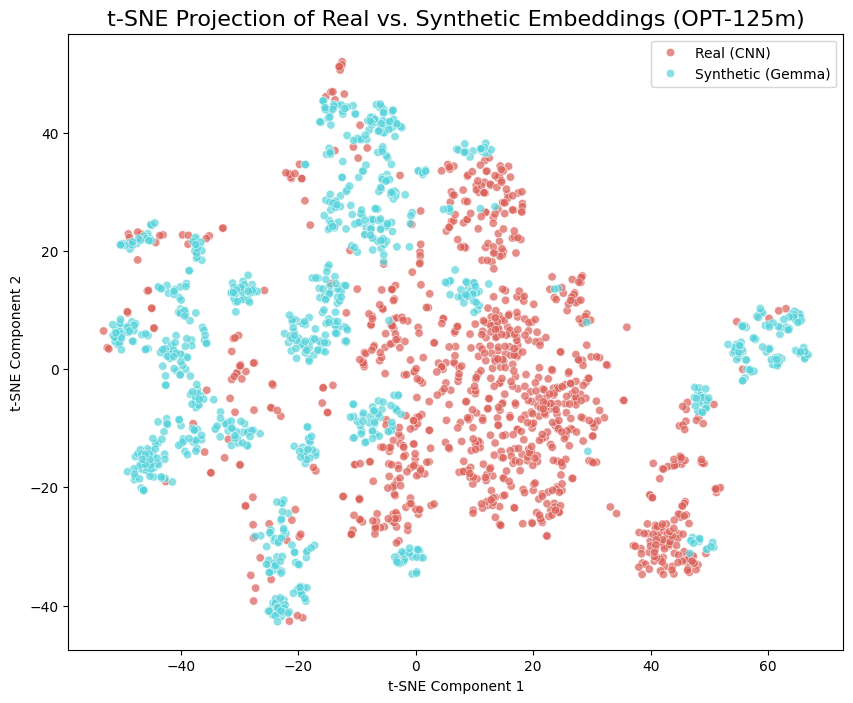

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

# Compute embeddings

real_texts = cnn_train['article'].sample(1000, random_state=42)
synth_texts = gemma_data['generated_article']

print("Computing embeddings for REAL texts (for t-SNE)...")
Er = compute_opt_embeddings(
    real_texts, 
    batch_size=8, 
    max_length=2048, 
    verbose=True, 
    label="real_tsne"
)

print("\nComputing embeddings for SYNTHETIC texts (for t-SNE)...")
Es = compute_opt_embeddings(
    synth_texts, 
    batch_size=8, 
    max_length=2048, 
    verbose=True, 
    label="synth_tsne"
)

# Combine embeddings and create labels
embeddings = np.concatenate([Er, Es], axis=0)
labels = ['Real (CNN)'] * len(Er) + ['Synthetic (Gemma)'] * len(Es)

print(f"\nRunning t-SNE on {embeddings.shape[0]} embeddings")

# Reduce 768 dimensions down to 2
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(embeddings)

# Create dataframe and plot

df_tsne = pd.DataFrame({
    'tsne_1': tsne_results[:, 0],
    'tsne_2': tsne_results[:, 1],
    'label': labels
})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne_1', y='tsne_2',
    hue='label',
    palette=sns.color_palette("hls", 2),
    data=df_tsne,
    alpha=0.7
)

plt.title('t-SNE Projection of Real vs. Synthetic Embeddings (OPT-125m)', fontsize=16)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(loc='best')
folder_path = "./figures/gemma"
folder = Path(folder_path)
folder.mkdir(parents=True, exist_ok=True)
plt.savefig(folder_path+'/tsne_embeddings.png')
plt.show()